<a href="https://colab.research.google.com/github/halici21/Experimental/blob/master/torsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
G = 40000                           # N/mm^2
R = 110                             # mm
W = np.array([3.5, 8.5, 13.5, 16])  # Newton
x = np.array([262, 439])            # mm
T = W * R                           # F*R = N*mm

In [ ]:
Bar_Names = ["Solid Bar", "Hollow Round Tube", "Square Hollow", "Slotted Tube"]

# Polar Moment Inertia

Bar-1

In [ ]:
D = 6                       # mm
J_1 = np.pi * (D ** 4) / 32 # mm^4

Bar-2

In [ ]:
D = 6                                # mm
d = 4                                # mm
J_2 = np.pi * (D ** 4 - d ** 4) / 32 # mm^4

Bar-3

In [ ]:
a = 5               # mm
t = 1               # mm
J_3 = (a ** 3) * t  # mm^4

Bar-4

In [ ]:
D = 6                                             # mm
d = 4                                             # mm
f = 0.3                                           # mm
t = 1                                             # mm
J_4 = (((D + d) * np.pi / 2) - f) * (t ** 3) / 3  # mm^4

In [ ]:
J = np.array([J_1, J_2, J_3, J_4])

In [ ]:
J

array([127.23450247, 102.10176124, 125.        ,   5.13598776])

In [ ]:
for a in range(4):
  print(f"{Bar_Names[a]} kesitinin verilen ölçülerine göre polar moment eylemsizliği: {J[a]} mm**4 ")

Solid Bar kesitinin verilen ölçülerine göre polar moment eylemsizliği: 127.23450247038662 mm**4 
Hollow Round Tube kesitinin verilen ölçülerine göre polar moment eylemsizliği: 102.10176124166827 mm**4 
Square Hollow kesitinin verilen ölçülerine göre polar moment eylemsizliği: 125.0 mm**4 
Slotted Tube kesitinin verilen ölçülerine göre polar moment eylemsizliği: 5.135987755982988 mm**4 


# Theoretical Calculations

In [ ]:
AoT_35N_262 = (T[0] * x[0]) / (J * G) * 180 / np.pi # 262 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]
AoT_35N_439 = (T[0] * x[1]) / (J * G) * 180 / np.pi # 439 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]

AoT_85N_262 = (T[1] * x[0]) / (J * G) * 180 / np.pi # 262 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]
AoT_85N_439 = (T[1] * x[1]) / (J * G) * 180 / np.pi # 439 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]

AoT_135N_262 = (T[2] * x[0]) / (J * G) * 180 / np.pi # 262 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]
AoT_135N_439 = (T[2] * x[1]) / (J * G) * 180 / np.pi # 439 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]

AoT_160N_262 = (T[3] * x[0]) / (J * G) * 180 / np.pi # 262 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]
AoT_160N_439 = (T[3] * x[1]) / (J * G) * 180 / np.pi # 439 mm uzaklıktaki noktanın çeşitli kesitli alanlara göre açı değişimi [degree]

data_series = [
    (AoT_35N_262),
    (AoT_35N_439),
    (AoT_85N_262),
    (AoT_85N_439),
    (AoT_135N_262),
    (AoT_135N_439),
    (AoT_160N_262),
    (AoT_160N_439),
]

In [ ]:
# Multi index denemesi
[(f"{W[i]} N", f"{x[j]/10} cm") for i in range(4) for j in range(2)]

[('3.5 N', '26.2 cm'),
 ('3.5 N', '43.9 cm'),
 ('8.5 N', '26.2 cm'),
 ('8.5 N', '43.9 cm'),
 ('13.5 N', '26.2 cm'),
 ('13.5 N', '43.9 cm'),
 ('16.0 N', '26.2 cm'),
 ('16.0 N', '43.9 cm')]

In [ ]:
# Satırları ikiye bölmek için multi index kullanıyorum
multi_index = pd.MultiIndex.from_tuples([
    (f"{W[i]} N", f"{x[j]/10} cm") for i in range(4) for j in range(2)
])

In [ ]:
# Kuvvetlere, ölçüm noktalarına ve kesitlerini içeren dataset
df_total = pd.DataFrame(data_series, columns = Bar_Names, index = multi_index)

In [ ]:
# Sütunlar için bir alt sütun oluşturdum
df_total.columns = pd.MultiIndex.from_product([df_total.columns, ["Angle of Twist (°)"]])

In [ ]:
df_total

Solid Bar  Hollow Round Tube      Square Hollow  \
               Angle of Twist (°) Angle of Twist (°) Angle of Twist (°)   
3.5 N  26.2 cm           1.135585           1.415114           1.155885   
       43.9 cm           1.902756           2.371126           1.936769   
8.5 N  26.2 cm           2.757850           3.436705           2.807149   
       43.9 cm           4.620978           5.758449           4.703582   
13.5 N 26.2 cm           4.380115           5.458297           4.458414   
       43.9 cm           7.339200           9.145772           7.470396   
16.0 N 26.2 cm           5.191247           6.469093           5.284046   
       43.9 cm           8.698311          10.839434           8.853802   

                     Slotted Tube  
               Angle of Twist (°)  
3.5 N  26.2 cm          28.132005  
       43.9 cm          47.137214  
8.5 N  26.2 cm          68.320583  
       43.9 cm         114.476091  
13.5 N 26.2 cm         108.509161  
       43.9 cm         181.814969  
16.0 N 26.2 cm         128.603450  
       43.9 cm         215.484407

# Plotting

## .xs() (Bu bölüm sadece bu methodun kullanım şekillerini anlatan bir bölümdür)

In [ ]:
# -----------------------------------------------
# 📝 Pandas `.xs()` (Cross-Section) Kullanımı Notları
# -----------------------------------------------

# 🏷️ 1. `.xs()` Nedir?
# - `.xs()` (cross-section), MultiIndex içindeki belirli bir **satır veya sütun seviyesini seçmek** için kullanılır.
# - **Seçilen seviyeyi kaldırır ve geri kalan seviyeleri korur.**
# - **Satırlarda (`level=0`) veya sütunlarda (`level=1`) kullanılabilir.**
# - `.loc[]` ile aynı sonucu verir ama **daha kısa ve okunaklıdır.**

# 🏷️ 2. `.xs()` Kullanımı - Satır Seçme (`level=0`)
# 🎯 2.1 Belirli bir satır seviyesini seçme
df_total.xs("8.5 N", level=0)
# -> "8.5 N" seviyesindeki tüm satırları getirir ve "Force" seviyesini kaldırır.

# 🎯 2.2 Belirli bir satır seviyesini seçme ve MultiIndex yapısını koruma
df_total.xs("8.5 N", level=0, drop_level=False)
# -> "8.5 N" seviyesindeki satırları getirir AMA seviyeyi korur.

# 🏷️ 3. `.xs()` Kullanımı - Sütun Seçme (`level=1`)
# 🎯 3.1 Belirli bir sütun seviyesini seçme
df_total.xs("Angle of Twist (°)", axis=1, level=1)
# -> "Angle of Twist (°)" olan sütunları getirir ve alt seviyeyi kaldırır.

# 🏷️ 4. `.xs()` ile Hem Satır Hem Sütun Seçme
df_total.xs("8.5 N", level=0).xs("Angle of Twist (°)", axis=1, level=1)
# -> "8.5 N" seviyesindeki satırları ve "Angle of Twist (°)" sütunlarını seçer.

# 🏷️ 5. `.xs()` ve `.loc[]` Karşılaştırması
# ❌ `.loc[]` Kullanımı (Daha Uzun)
df_total.loc["8.5 N", (slice(None), "Angle of Twist (°)")]

# ✅ `.xs()` Kullanımı (Daha Kısa)
df_total.xs("8.5 N", level=0).xs("Angle of Twist (°)", axis=1, level=1)

# 🏷️ 6. `.xs()` Kullanırken Hata Alırsan
# - `.xs()` kullanmadan önce `df_total.index` veya `df_total.columns` MultiIndex olup olmadığını kontrol et.
# - Eğer `.xs()` çağrısı sonrası MultiIndex kayboluyorsa, `drop_level=False` ekleyerek koruyabilirsin.
# - Eğer sütunlarda MultiIndex yoksa `.xs()` yerine `.loc[]` kullan.

# -----------------------------------------------
# 🎯 Özet: `.xs()` MultiIndex İçin Kullanışlıdır
# - `df.xs("8.5 N", level=0)`: 8.5 N kuvvetindeki tüm verileri getirir.
# - `df.xs("Angle of Twist (°)", axis=1, level=1)`: Sadece "Angle of Twist (°)" sütunlarını getirir.
# - `.xs()` ile `.loc[]` kıyaslandığında, `.xs()` **daha kısa ve okunaklıdır**.
# -----------------------------------------------


,Solid Bar,Hollow Round Tube,Square Hollow,Slotted Tube
26.2 cm,2.757850,3.436705,2.807149,68.320583
43.9 cm,4.620978,5.758449,4.703582,114.476091


In [ ]:
df_total.loc["13.5 N"]

,Solid Bar,Hollow Round Tube,Square Hollow,Slotted Tube
,Angle of Twist (°),Angle of Twist (°),Angle of Twist (°),Angle of Twist (°)
26.2 cm,4.380115,5.458297,4.458414,108.509161
43.9 cm,7.339200,9.145772,7.470396,181.814969


In [ ]:
df_total.xs("8.5 N", level=0).xs("Angle of Twist (°)", axis=1, level=1)

,Solid Bar,Hollow Round Tube,Square Hollow,Slotted Tube
26.2 cm,2.757850,3.436705,2.807149,68.320583
43.9 cm,4.620978,5.758449,4.703582,114.476091


In [ ]:
df_total.xs("8.5 N", level=0).xs("Angle of Twist (°)", axis=1, level=1)["Solid Bar"]

,Solid Bar
26.2 cm,2.757850
43.9 cm,4.620978


## Angle of Twist vs. Measure Point for Different Sections

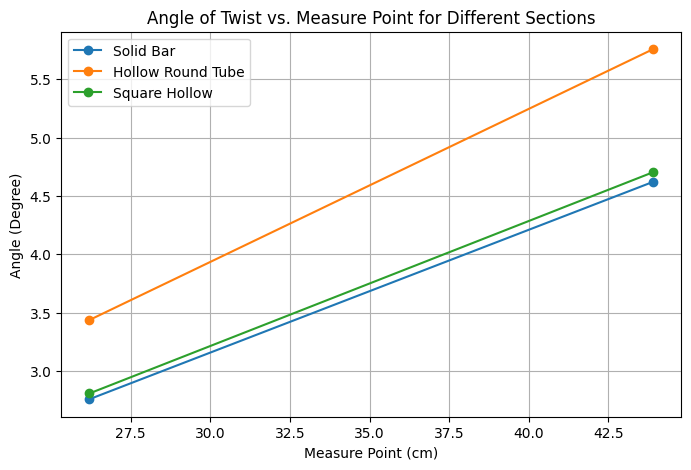

In [ ]:
# Grafiği oluşturma
plt.figure(figsize=(8, 5))

for a in range(3):
  plt.plot(x/10, df_total.xs("8.5 N", level=0).xs("Angle of Twist (°)", axis=1, level=1)[Bar_Names[a]], marker='o', linestyle='-', label=Bar_Names[a])


# Başlık ve etiketler
plt.title("Angle of Twist vs. Measure Point for Different Sections")
plt.xlabel("Measure Point (cm)")
plt.ylabel("Angle (Degree)")
plt.legend()
plt.grid(True)

# Grafiği göster
plt.show()



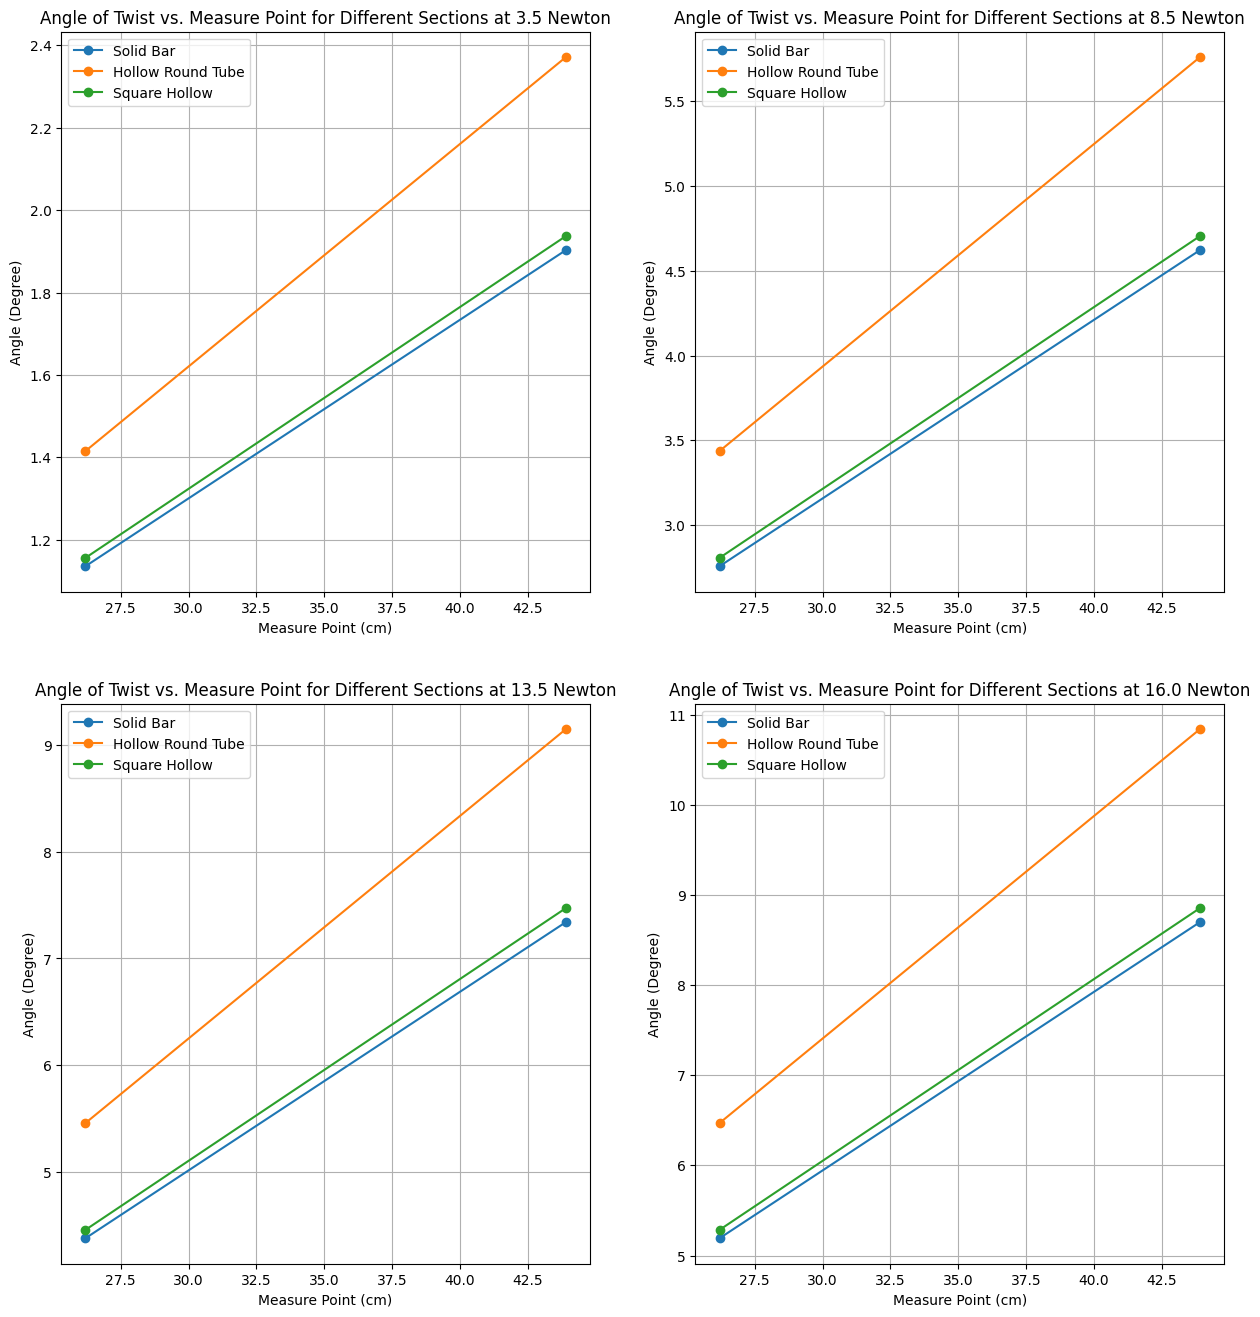

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 16))  # 2x2 grid
axes = axes.flatten()  # 2D array'i düzleştir


for i in range(4):
  for a in range(3):
    axes[i].plot(x/10, df_total.xs(f"{W[i]} N", level=0).xs("Angle of Twist (°)", axis=1, level=1)[Bar_Names[a]], marker='o', linestyle='-', label=Bar_Names[a])
    # Başlık ve etiketler
    axes[i].set_title(f"Angle of Twist vs. Measure Point for Different Sections at {W[i]} Newton")
    axes[i].set_xlabel("Measure Point (cm)")
    axes[i].set_ylabel("Angle (Degree)")
    axes[i].legend()
    axes[i].grid(True)




# Grafiği göster
plt.show()

## Angle of Twist vs. Torque for Different Sections

In [ ]:
# deneme
df_total.xs("26.2 cm", level=1).xs("Angle of Twist (°)", axis=1, level=1)["Solid Bar"]

,Solid Bar
3.5 N,1.135585
8.5 N,2.757850
13.5 N,4.380115
16.0 N,5.191247


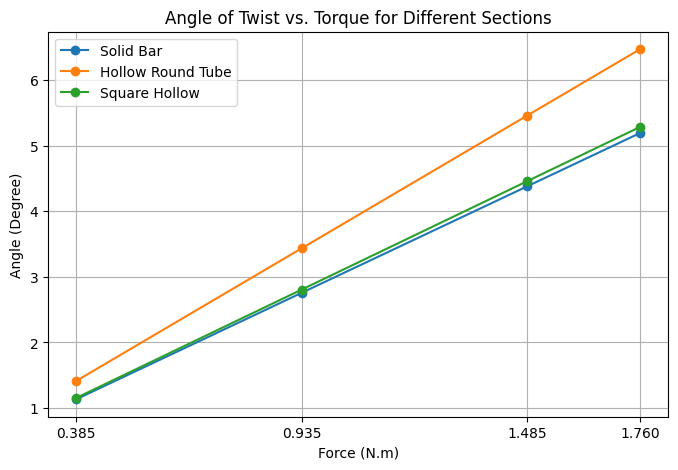

In [ ]:
# Grafiği oluşturma
plt.figure(figsize=(8, 5))

for a in range(3):
  plt.plot(T/1000, df_total.xs("26.2 cm", level=1).xs("Angle of Twist (°)", axis=1, level=1)[Bar_Names[a]], marker='o', linestyle='-', label=Bar_Names[a])


# Başlık ve etiketler
plt.title("Angle of Twist vs. Torque for Different Sections")
plt.xlabel("Torque (N.m)")
plt.ylabel("Angle (Degree)")
plt.legend()
plt.xticks(T/1000)
plt.grid(True)

# Grafiği göster
plt.show()

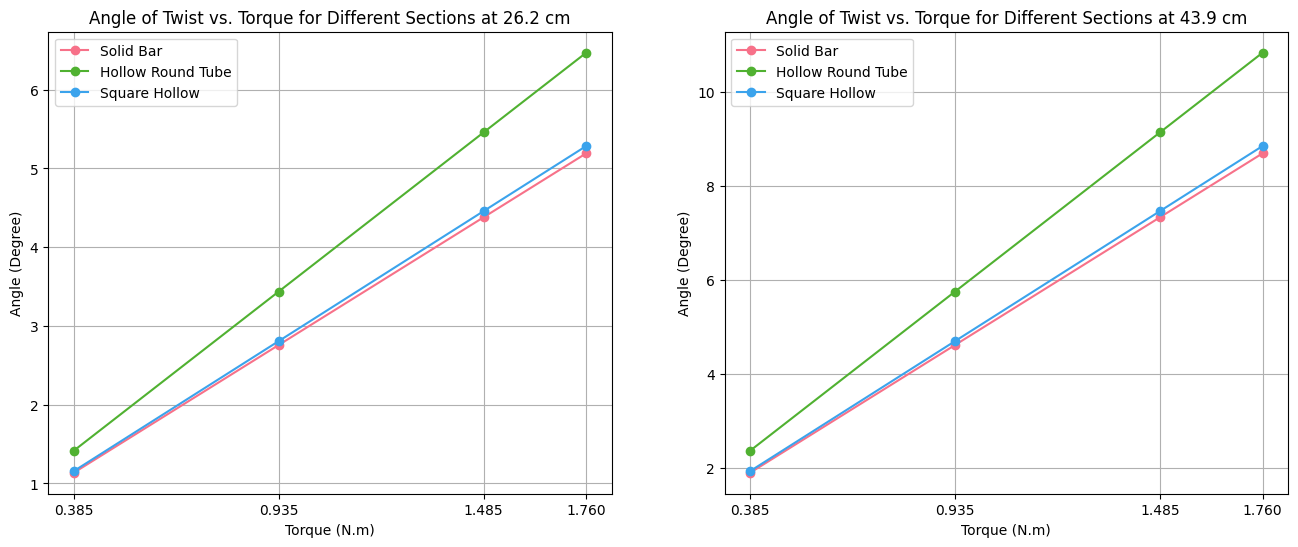

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 2x1 grid
axes = axes.flatten()  # 2D array'i düzleştir
palette = sns.color_palette("husl", 3)  # 3 farklı renk al

for i in range(2):
  for a in range(3):
    axes[i].plot(T/1000, df_total.xs(f"{x[i]/10} cm", level=1).xs("Angle of Twist (°)", axis=1, level=1)[Bar_Names[a]], marker='o', linestyle='-', label=Bar_Names[a], color=palette[a])
    axes[i].set_title(f"Angle of Twist vs. Torque for Different Sections at {x[i]/10} cm")
    axes[i].set_xlabel("Torque (N.m)")
    axes[i].set_ylabel("Angle (Degree)")
    axes[i].legend()
    axes[i].set_xticks(T/1000)
    axes[i].grid(True)


## Torque vs. Polar Moment Inertia vs. Angle of Twist Relation (3D)

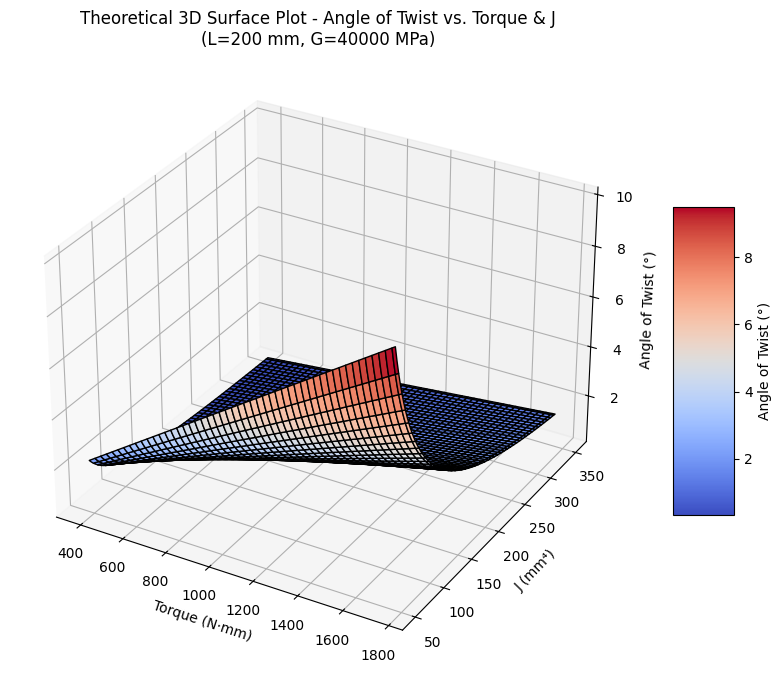

In [ ]:
# Newton (Torque) ve J (Inertial Moment) değerlerini belirleyelim
T_values = np.linspace(385, 1760, 100)  # Torque (N.mm) - 100 ölçüm noktası
J_values = np.linspace(50, 350, 100)  # J - Inertial Moment (100 ~ 200 mm^4)

# Meshgrid oluştur (X: Torque, Y: J)
T_grid, J_grid = np.meshgrid(T_values, J_values)

# Güncellenmiş Malzeme Özellikleri
L = 200  # Uzunluk (mm)
G = 40000  # Shear Modulus (MPa)

# Angle of Twist formülü: θ = (T * L) / (J * G)
Z_grid_radian = (T_grid * L) / (J_grid * G)  # Radyan cinsinden
Z_grid_degree = np.degrees(Z_grid_radian)  # Dereceye çevrildi

# 3D Grafik oluştur
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot çiz (Daha açık renkli colormap: "coolwarm")
surf = ax.plot_surface(T_grid, J_grid, Z_grid_degree, cmap=cm.coolwarm, alpha=1, edgecolor='k')

# Eksen etiketleri ve başlık (Birimler eklendi)
ax.set_xlabel("Torque (N·mm)")
ax.set_ylabel("J (mm⁴)")
ax.set_zlabel("Angle of Twist (°)")
ax.set_title("Theoretical 3D Surface Plot - Angle of Twist vs. Torque & J\n(L=200 mm, G=40000 MPa)")

# Colorbar ekleyelim (Daha iyi görünürlük için açık renkler tercih edildi)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Angle of Twist (°)")

# Grafiği göster
plt.show()


## Torque vs. Length vs. Angle of Twist Relation (3D)

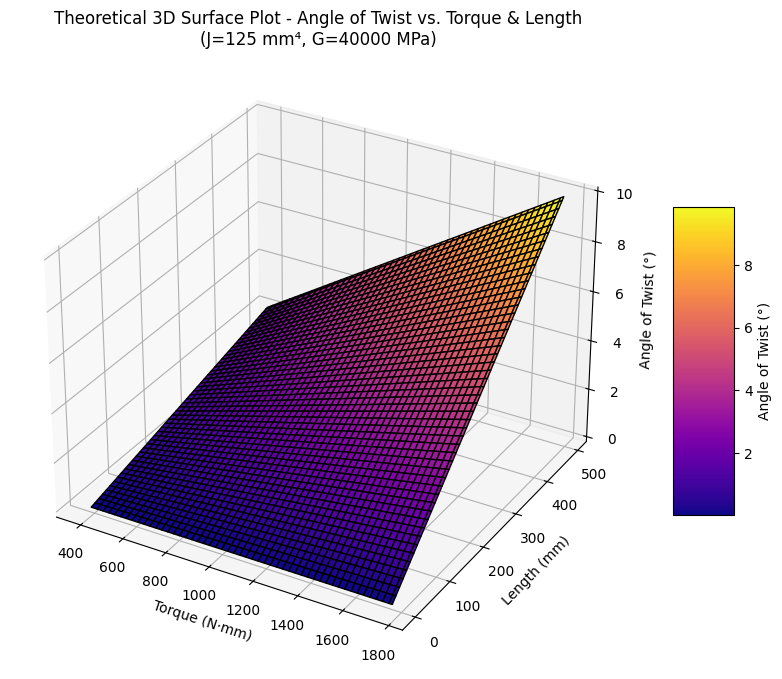

In [ ]:
# Newton (Torque) ve L (Length) değerlerini belirleyelim
T_values = np.linspace(385, 1760, 100)  # Torque (N.mm) - 100 ölçüm noktası
L_values = np.linspace(0, 493, 100)  # L - Length (0 ~ 493 mm)

# Meshgrid oluştur (X: Torque, Y: L)
T_grid, L_grid = np.meshgrid(T_values, L_values)

# Güncellenmiş Malzeme Özellikleri
J = 125  # Kesit Ataleti (mm⁴) - Sabit değer
G = 40000  # Shear Modulus (MPa)

# Angle of Twist formülü: θ = (T * L) / (J * G)
Z_grid_radian = (T_grid * L_grid) / (J * G)  # Radyan cinsinden
Z_grid_degree = np.degrees(Z_grid_radian)  # Dereceye çevrildi

# 3D Grafik oluştur
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot çiz (Yeni colormap: "plasma" kullanıldı)
surf = ax.plot_surface(T_grid, L_grid, Z_grid_degree, cmap=cm.plasma, alpha=1, edgecolor='k')

# Eksen etiketleri ve başlık (Birimler eklendi)
ax.set_xlabel("Torque (N·mm)")
ax.set_ylabel("Length (mm)")
ax.set_zlabel("Angle of Twist (°)")
ax.set_title("Theoretical 3D Surface Plot - Angle of Twist vs. Torque & Length\n(J=125 mm⁴, G=40000 MPa)")

# Colorbar ekleyelim (Daha belirgin olması için "plasma" colormap kullanıldı)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Angle of Twist (°)")

# Grafiği göster
plt.show()


# Measure vs. Theoretical Data

In [ ]:
a = 0.5

In [ ]:
measure = pd.DataFrame({"Force/ Measure Point": ["3.5 N", "8.5 N", "13.5 N", "16 N"],
              "26.2 cm" : [1.5, 3, 5, 6],
              "43.9 cm" : [2+a, 4.5+a, 9+a, 10+a]})

In [ ]:
measure

,Force/ Measure Point,26.2 cm,43.9 cm
0,3.5 N,1.5,2.5
1,8.5 N,3.0,5.0
2,13.5 N,5.0,9.5
3,16 N,6.0,10.5


In [ ]:
# Solid Bar kesitinin teorik değerlerine erişme kısmı
df_total.xs("Solid Bar", axis = 1, level = 0)["Angle of Twist (°)"]

3.5 N   26.2 cm    1.135585
        43.9 cm    1.902756
8.5 N   26.2 cm    2.757850
        43.9 cm    4.620978
13.5 N  26.2 cm    4.380115
        43.9 cm    7.339200
16.0 N  26.2 cm    5.191247
        43.9 cm    8.698311
Name: Angle of Twist (°), dtype: float64

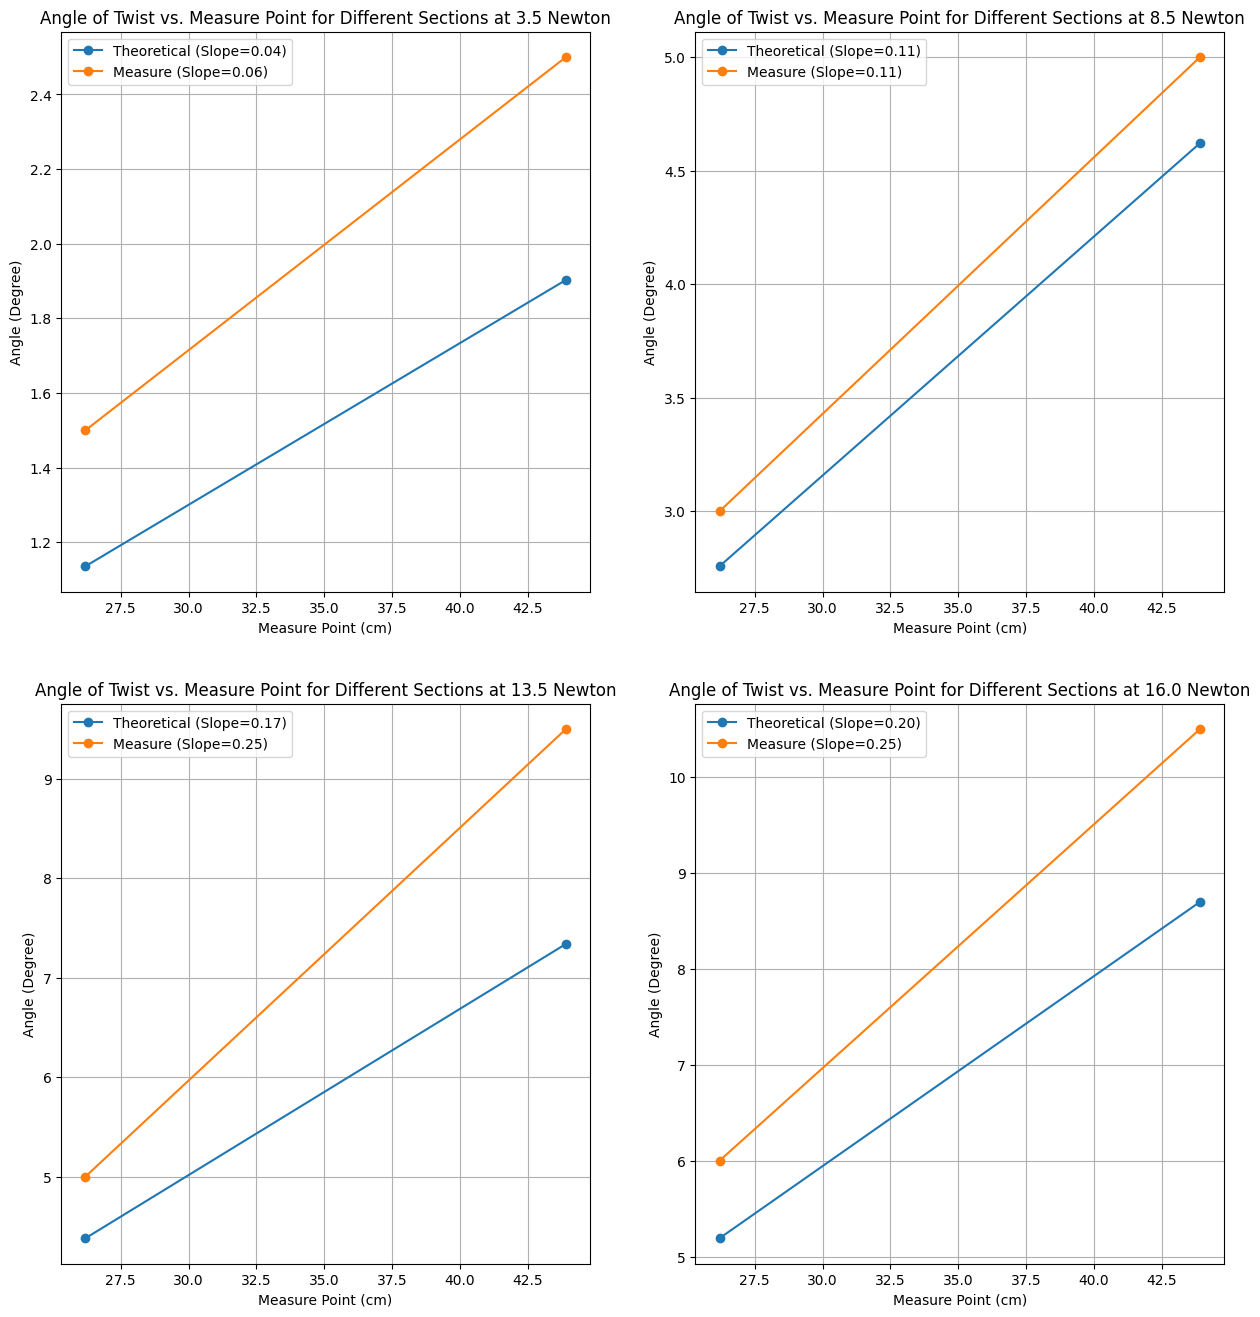

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 16))  # 2x2 grid
axes = axes.flatten()  # 2D array'i düzleştir

for i in range(4):
    # Teorik değerleri çek
    x_values = x / 10  # Ölçüm noktaları
    theoretical_values = df_total.xs(f"{W[i]} N", level=0).xs("Angle of Twist (°)", axis=1, level=1)["Solid Bar"]

    # Ölçüm değerlerini çek
    measure_values = measure.iloc[i, 1:].astype(float).values

    # Eğimi hesapla (np.polyfit kullanarak)
    slope_theoretical, _ = np.polyfit(x_values, theoretical_values, 1)
    slope_measure, _ = np.polyfit(x_values, measure_values, 1)

    # Teorik verileri çiz
    axes[i].plot(x_values, theoretical_values, marker='o', linestyle='-',
                 label=f"Theoretical (Slope={slope_theoretical:.2f})")

    # Ölçüm verilerini çiz
    axes[i].plot(x_values, measure_values, marker='o', linestyle='-',
                 label=f"Measure (Slope={slope_measure:.2f})")

    # Başlık ve etiketler
    axes[i].set_title(f"Angle of Twist vs. Measure Point for Different Sections at {W[i]} Newton")
    axes[i].set_xlabel("Measure Point (cm)")
    axes[i].set_ylabel("Angle (Degree)")
    axes[i].legend()
    axes[i].grid(True)

# Grafiği göster
plt.show()
